#### Data prep and structuring...

In [1]:
install.packages("mlbench", repos = "http://cran.us.r-project.org")
install.packages("DataExplorer", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(pryr)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial

corrplot 0.84 loaded

Attaching package: ‘e1071’

The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness

Loading required package: sp
Loading required package: raster

Attaching package: ‘r

In [2]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

In [3]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')

#### Sanity checks...

In [4]:
summary(Boston)
str(Boston)

     Crime             LrgLots           IndAcr          River        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX              Rms            OwnOcc          DistWork     
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
    HiwayAcc         PropTa

'data.frame':	506 obs. of  14 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ River    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ HiwayAcc : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### Remove factors and sanity checks.

In [5]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))
summary(BostonNum)
str(BostonNum)

     Crime             LrgLots           IndAcr           NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
      Rms            OwnOcc          DistWork         PropTax     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   :187.0  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.:279.0  
 Median :6.208   Median : 77.50   Median : 3.207   Median :330.0  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   :408.2  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:666.0  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :711.0  
     EdRat            Min           LowSt

'data.frame':	506 obs. of  12 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [6]:
Boston$HiwayAcc <- as.factor(Boston$HiwayAcc)
for (col in c('Crime', 'LrgLots', 'IndAcr', 'Min', 'River'))
        Boston[[paste0(col, "_d")]] <- as.factor(ggplot2::cut_interval(Boston[[col]], 2))

In [7]:
summary(BostonNum)
str(BostonNum)

     Crime             LrgLots           IndAcr           NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
      Rms            OwnOcc          DistWork         PropTax     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   :187.0  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.:279.0  
 Median :6.208   Median : 77.50   Median : 3.207   Median :330.0  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   :408.2  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:666.0  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :711.0  
     EdRat            Min           LowSt

'data.frame':	506 obs. of  12 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### Begin to build the samples.  In this case, we will compare a sample of n = 5 to the original data set and see what we can learn from such a dramatic comparison.

In [8]:
BMn <- map_dbl(BostonNum, mean)
BSd <- map_dbl(BostonNum, sd)
BMd <- map_dbl(BostonNum, median)
BSk <- map_dbl(BostonNum, skewness)
BKu <- map_dbl(BostonNum, kurtosis)
BStatsDF <- rbind(BMn, BSd, BMd, BSk, BKu)
BStatsDF

,Crime,LrgLots,IndAcr,NOX,Rms,OwnOcc,DistWork,PropTax,EdRat,Min,LowStatus,MedVal
BMn,3.613524,11.363636,11.1367787,0.55469506,6.2846344,68.5749012,3.7950427,408.2371542,18.4555336,356.674032,12.6530632,22.532806
BSd,8.601545,23.322453,6.8603529,0.11587768,0.7026171,28.1488614,2.1057101,168.5371161,2.1649455,91.294864,7.1410615,9.197104
BMd,0.256510,0.000000,9.6900000,0.53800000,6.2085000,77.5000000,3.2074500,330.0000000,19.0500000,391.440000,11.3600000,21.200000
BSk,5.192222,2.212488,0.2932747,0.72498966,0.4012223,-0.5954162,1.0057898,0.6659891,-0.7975743,-2.873260,0.9010929,1.101537
BKu,36.595816,3.952387,-1.2401949,-0.08741064,1.8418324,-0.9780297,0.4575916,-1.1503176,-0.3048010,7.103715,0.4628171,1.450984


In [9]:
set.seed(101)
BostSamp05 <- BostonNum[sample(1:nrow(BostonNum), 05, replace = FALSE),]

In [10]:
BSamp05Mn <- map_dbl(BostSamp05, mean)
BSamp05Sd <- map_dbl(BostSamp05, sd)
BSamp05Md <- map_dbl(BostSamp05, median)
BSamp05Sk <- map_dbl(BostSamp05, skewness)
BSamp05Ku <- map_dbl(BostSamp05, kurtosis)

#### We have our data and the sample, so now to compare and contrast the two.

#### As expected, the density plots show little similarity.

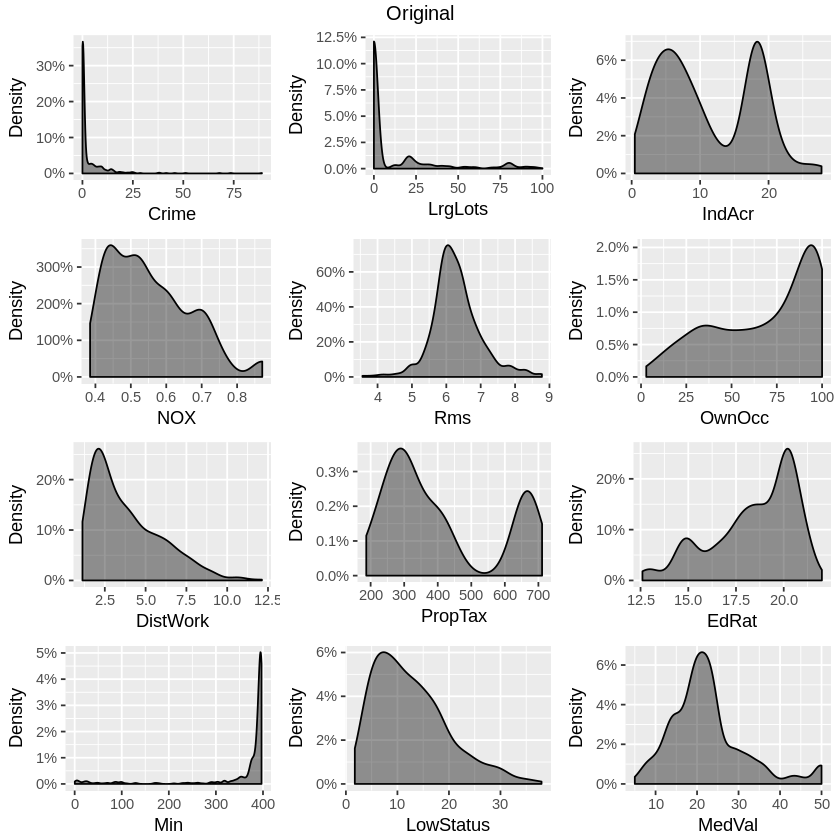

In [11]:
plot_density(BostonNum, title = 'Original')

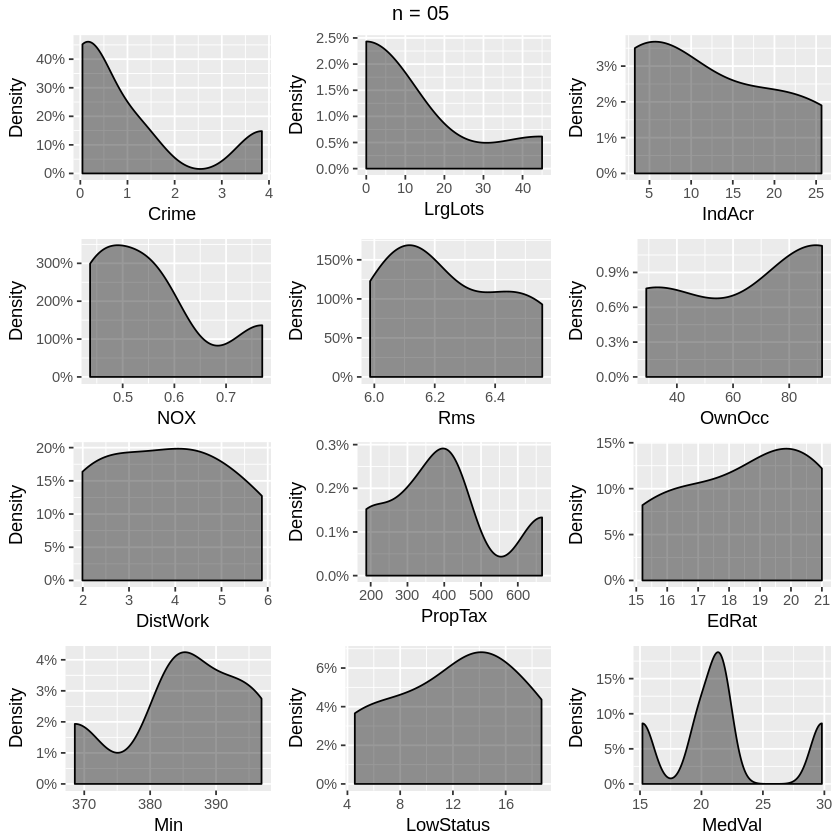

In [12]:
plot_density(BostSamp05, title = 'n = 05')

#### We see the same problem in the tabular representation of the data set and the sample.  There is no common ground between the two.

In [13]:
BSamp05DF <- rbind(BSamp05Mn, BSamp05Sd, BSamp05Md, BSamp05Sk, BSamp05Ku)

In [14]:
as_tibble(BStatsDF, rownames = 'Statistic')
as_tibble(BSamp05DF, rownames = 'Statistic')

Statistic,Crime,LrgLots,IndAcr,NOX,Rms,OwnOcc,DistWork,PropTax,EdRat,Min,LowStatus,MedVal
BMn,3.613524,11.363636,11.1367787,0.55469506,6.2846344,68.5749012,3.7950427,408.2371542,18.4555336,356.674032,12.6530632,22.532806
BSd,8.601545,23.322453,6.8603529,0.11587768,0.7026171,28.1488614,2.1057101,168.5371161,2.1649455,91.294864,7.1410615,9.197104
BMd,0.256510,0.000000,9.6900000,0.53800000,6.2085000,77.5000000,3.2074500,330.0000000,19.0500000,391.440000,11.3600000,21.200000
BSk,5.192222,2.212488,0.2932747,0.72498966,0.4012223,-0.5954162,1.0057898,0.6659891,-0.7975743,-2.873260,0.9010929,1.101537
BKu,36.595816,3.952387,-1.2401949,-0.08741064,1.8418324,-0.9780297,0.4575916,-1.1503176,-0.3048010,7.103715,0.4628171,1.450984


Statistic,Crime,LrgLots,IndAcr,NOX,Rms,OwnOcc,DistWork,PropTax,EdRat,Min,LowStatus,MedVal
BSamp05Mn,1.0844840,9.000000,11.7140000,0.5572000,6.2446000,66.4800000,3.78306000,397.800000,18.4800000,384.9340000,12.0900000,21.580000
BSamp05Sd,1.6205786,20.124612,9.8492934,0.1323960,0.2275474,32.7496107,1.57000176,176.938407,2.3952035,10.6816984,5.4417047,5.279394
BSamp05Md,0.1690200,0.000000,8.1400000,0.5380000,6.1440000,88.4000000,3.97690000,398.000000,19.1000000,385.0200000,13.2700000,21.400000
BSamp05Sk,0.8635692,1.073313,0.3655552,0.6022089,0.2411624,-0.2915131,0.09309731,0.337296,-0.2605591,-0.3962865,-0.1747007,0.394264
BSamp05Ku,-1.2259524,-0.920000,-1.9503883,-1.4709196,-1.9108147,-2.2471495,-1.93297547,-1.534789,-1.9596708,-1.5572598,-1.7946174,-1.395471


#### Pairs plots of the original versus the sample confirm what have seen already.  The pairs plot of n = 5 is pretty much meaningless, but it is intersting to see how much information can be lost in conversion from a complete data set to a poor sample.  The lesson being it is important to get sampling correct or whatever analysis follows will be futile.  The linear relationships we might be seeing in the original data do not stand out in the sample.

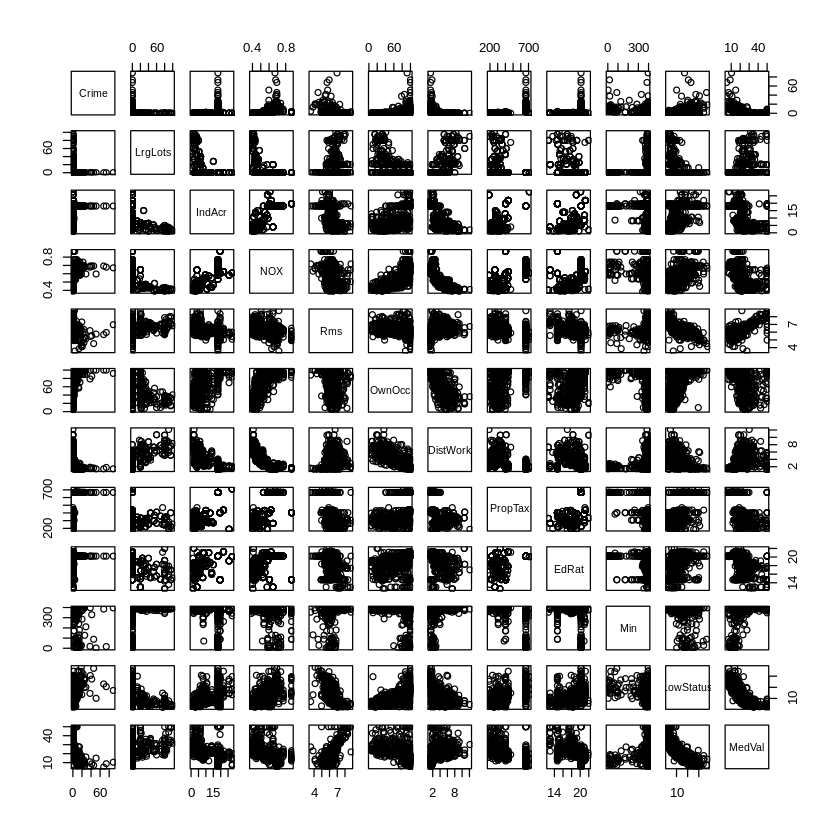

In [15]:
pairs(BostonNum)

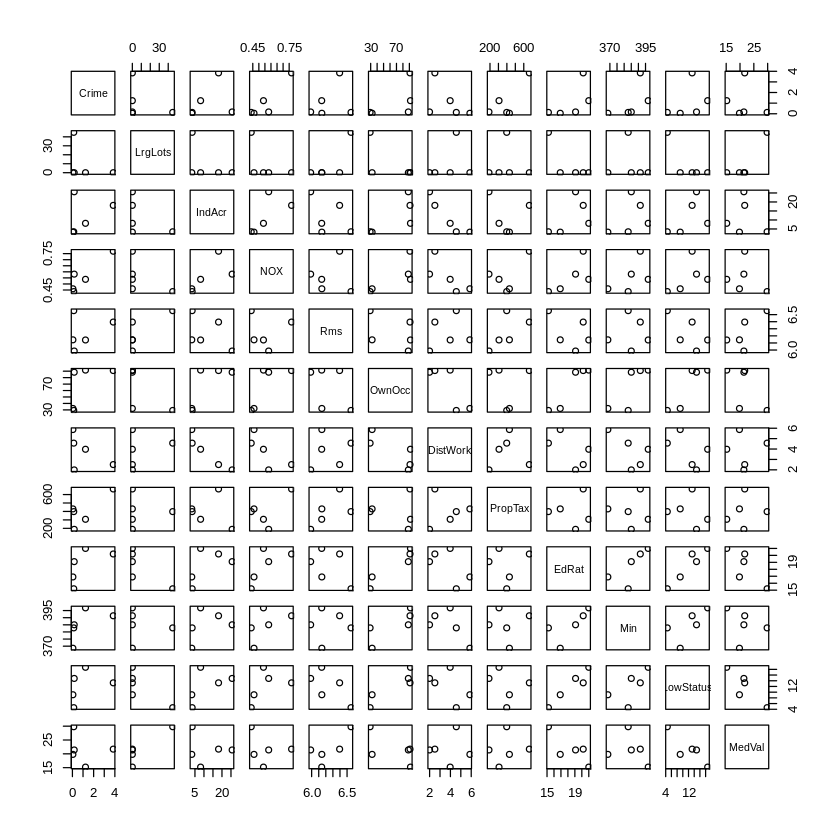

In [16]:
pairs(BostSamp05)

#### But we can standardize the data to see if putting the sample and the original data sets on the same scale helps.  Remember, scaling data does not change the statistical characteristics of the distribution, it simply creates a common scale between the two data sets.  It's like taking one data set in miles and comparing it to another in yards and converting them both to feet for the sake of having a common unit of comparison.

#### Here, we are simply standardizing the sample data using Z-scores, which puts the data on a scale relative to the data's standard deviation.  First, we standardize the sample data then explore them in a table and a histogram.

In [17]:
BStatsTib <- as_tibble(BStatsDF, rownames = 'Statistic')
BSampTib <- as_tibble(BSamp05DF, rownames = 'Statistic')
BSampZ <- scale(BostSamp05, center = TRUE, scale = TRUE)
BSampZTib <- as_tibble(BSampZ, rownames = 'Z Scores')
BSampZTib

Z Scores,Crime,LrgLots,IndAcr,NOX,Rms,OwnOcc,DistWork,PropTax,EdRat,Min,LowStatus,MedVal
189,-0.59157512,1.7888544,-0.8400603,-0.9078824,1.3685063,-1.1413876,0.4991332,0.001130337,-1.3694035,-0.196036241,-1.3837576,1.55699691
23,0.09131677,-0.4472136,-0.3628687,-0.1450195,-0.4508952,0.7700855,0.1234648,-0.513172925,1.0521027,1.120233842,1.2183682,-1.20847205
358,1.70631400,-0.4472136,0.6483714,1.6072994,0.6609613,0.7487112,-0.8139227,1.515781701,0.7181018,0.599717365,0.2168438,0.02272988
331,-0.64115618,-0.4472136,-0.8603663,-0.7341612,-0.4421058,-1.0467300,1.3315526,0.181984231,-0.6596517,-1.531966120,-0.5512978,-0.33715991
126,-0.56489947,-0.4472136,1.4149238,0.1797637,-1.1364667,0.6693209,-1.1402280,-1.185723344,0.2588507,0.008051154,0.4998434,-0.03409482


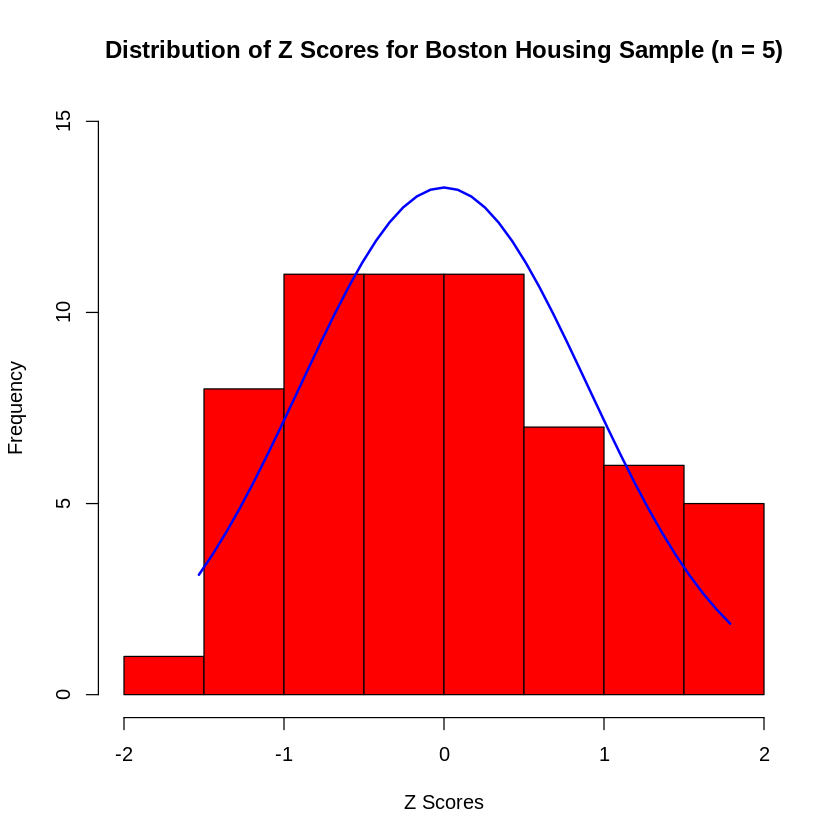

In [18]:
h <- hist(BSampZ, main = 'Distribution of Z Scores for Boston Housing Sample (n = 5)', xlab = 'Z Scores', ylim = c(0, 15), col = 'red')
xfit <- seq(min(BSampZ), max(BSampZ), length = 40)
yfit <- dnorm(xfit, mean = mean(BSampZ), sd = sd(BSampZ))
yfit <- yfit * diff(h$mids[1:2]) * length(BSampZ)
lines(xfit, yfit, col = 'blue', lwd = 2)

#### We haven't seen much evidence of a normal distribution in the data up to this point.  But upon standardizing the small sample set, we can see how the process pushes the data into a more normal distribution.  The blue line represents a theoretical normal curve based on the same data.  The Z-scores are perfectly distributed, but they bear a much better resemblance to the normal curve than the raw data did.

#### Another visual test we can put the standardized data through are quantile plots, similar to the one we saw in a previous notebook.  Again, the red line through the plot represents a theoretical normal distribution the data would take.  We want to see how closely our scaled data follow the line.

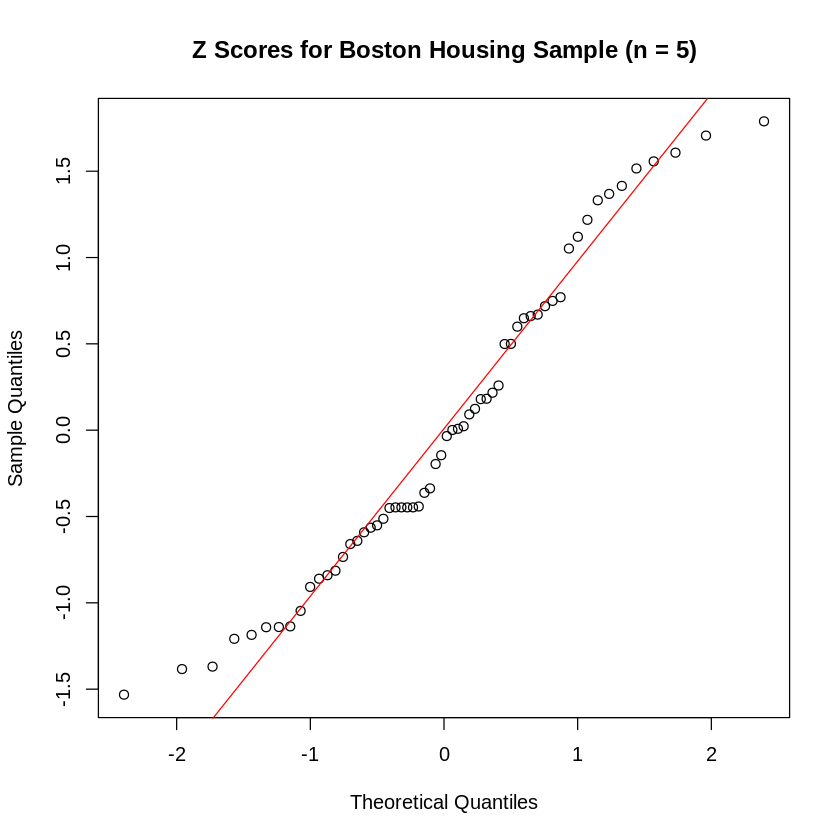

In [19]:
qqnorm(BSampZ,main = 'Z Scores for Boston Housing Sample (n = 5)')
qqline(BSampZ, col = 'red')

#### Again, it's not perfect, but it is much better than we have seen it up to this point.  

#### The idea here is that it is possible to transform the data through standardization and scaling methods to make it more suitable for analysis.  We suspect there are linear relationships in our data, and linear regression models might be useful for building predictions and a better understanding of the data.  If the data more resemble a normal curve than not, the analytical task becomes easier.

#### This is known as "torturing the data."

#### Developing heatmaps can also tell us something about the value of scaling and standardization.

#### The first heatmap describes the raw data in the sample n = 5.  There is not much differentiation in the colors which means there is little additional information to be had in comparing one element in the sample to any other.  And the dendograms, or "trees," can't tell us much we don't already know about any relationships between variables or sample rows.  The raw data in a sample can lack information because differences in scale make comparisons almost meaningless.

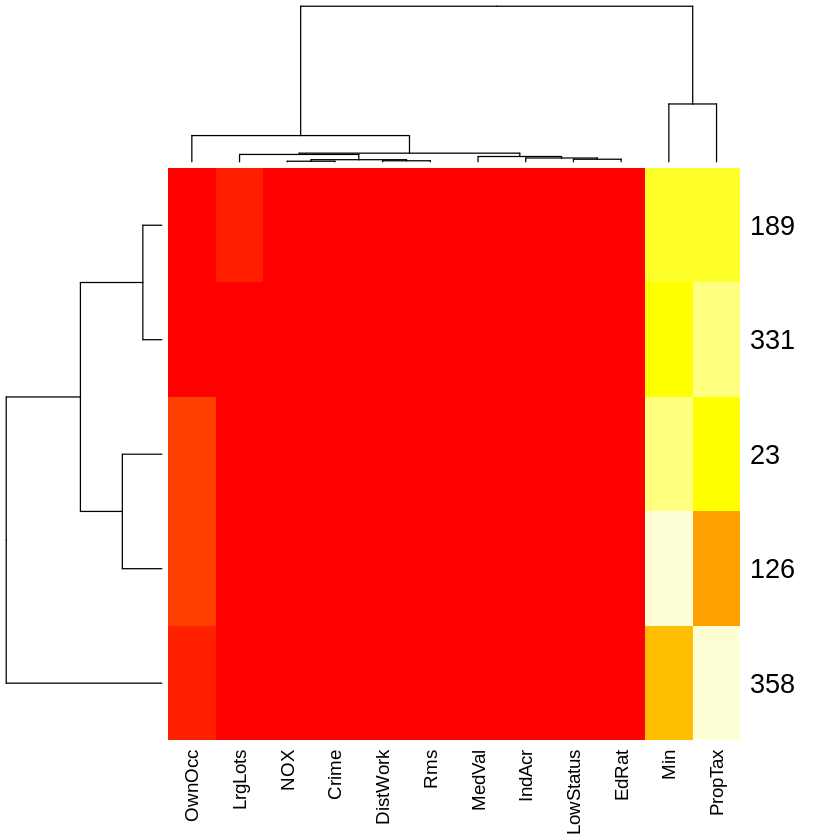

In [20]:
heatmap(data.matrix(BostSamp05))

#### One advantage of scaling is putting the data on an "apples-to-apples" basis can elicit valuable information that might not have been evident before.  In the heatmap below, performed on the Z-scores of the sample data,  It is easy to see more differentiation in the data values.  And the dendograms help us identify relationships between features and sample rows which we might not have noticed in the raw data.

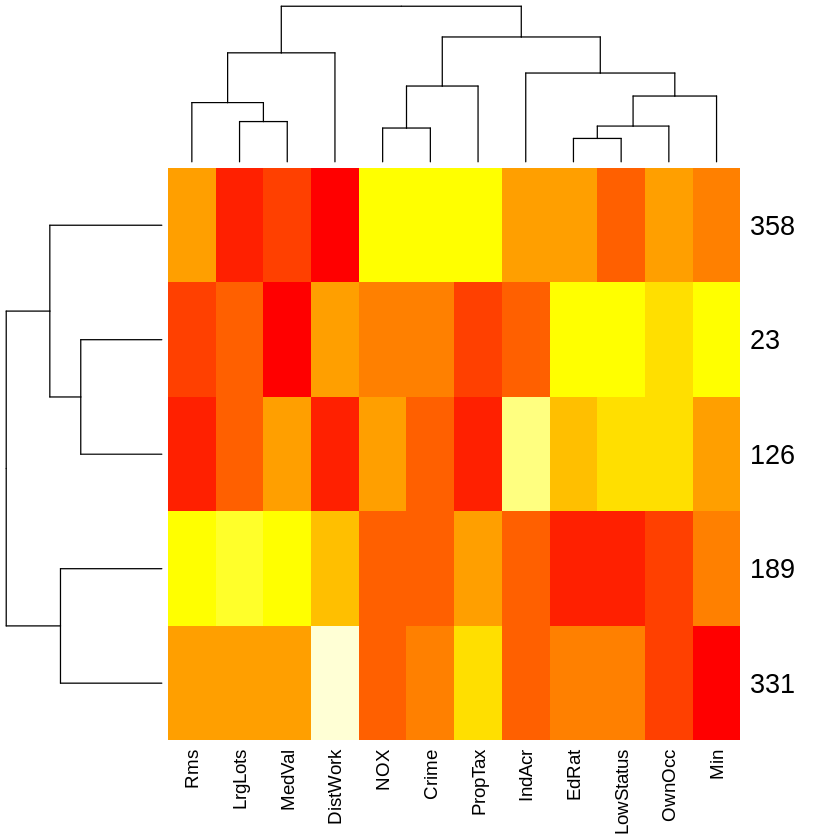

In [21]:
heatmap(BSampZ)

#### We can finish with other common visualization that help us understand that scaling does not change the distribution of data, simply the scale on which we make comparisons.  First, the sample data and the Z-scores are represented in a histogram.

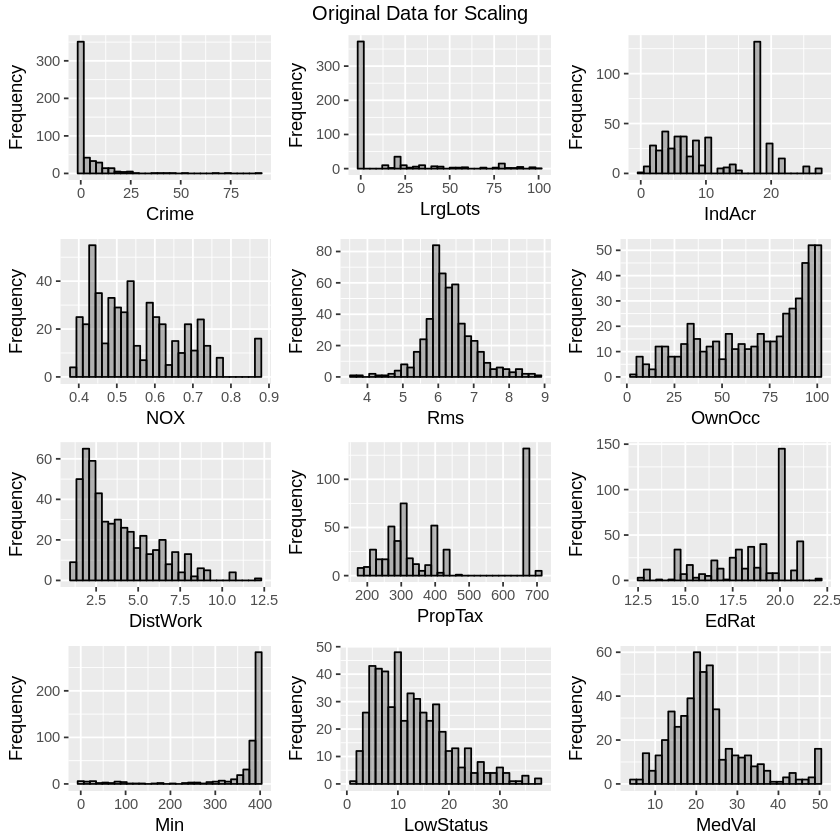

In [22]:
plot_histogram(BostonNum, title = 'Original Data for Scaling')

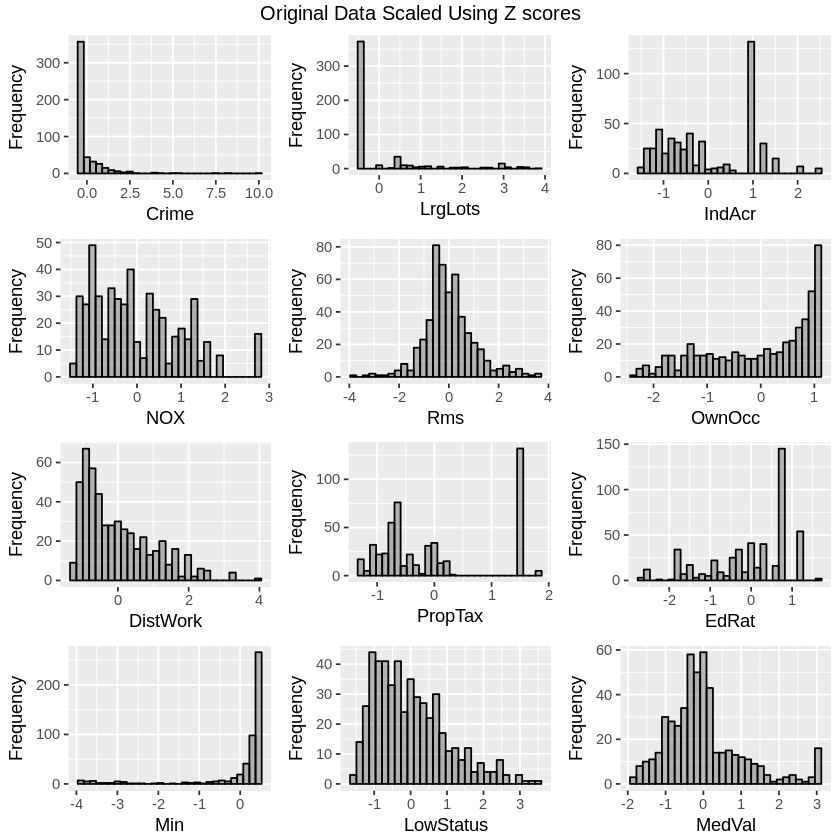

In [23]:
z <- scale(BostonNum, center = TRUE, scale = TRUE)
plot_histogram(z, title = 'Original Data Scaled Using Z scores')

#### Boxplots tell the same story and illustrate the same principle at work.

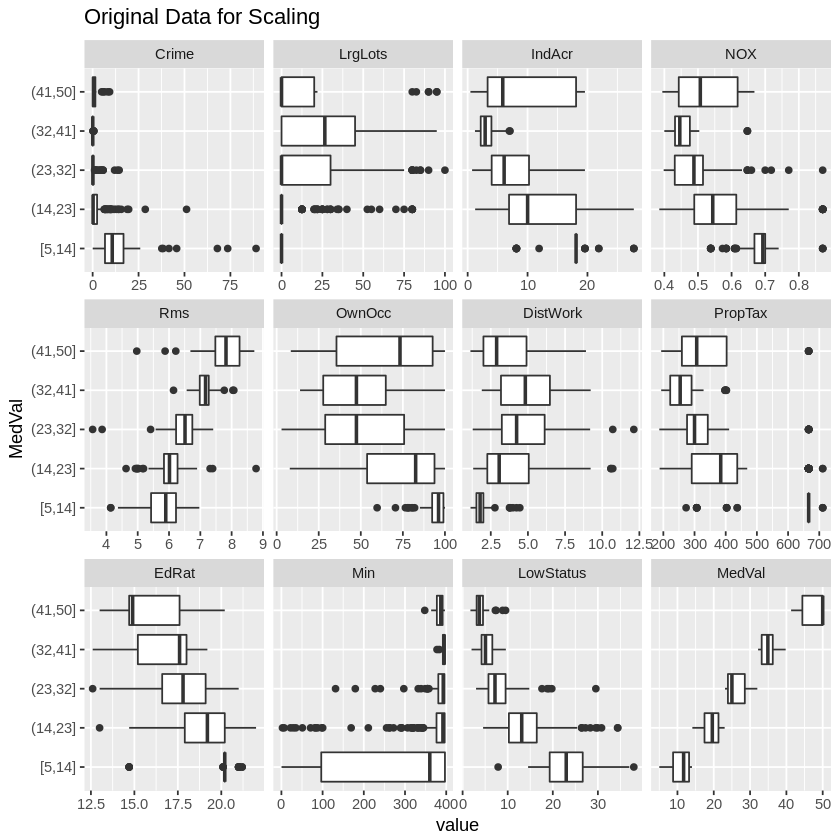

In [24]:
plot_boxplot(BostonNum, by = 'MedVal', title = 'Original Data for Scaling')

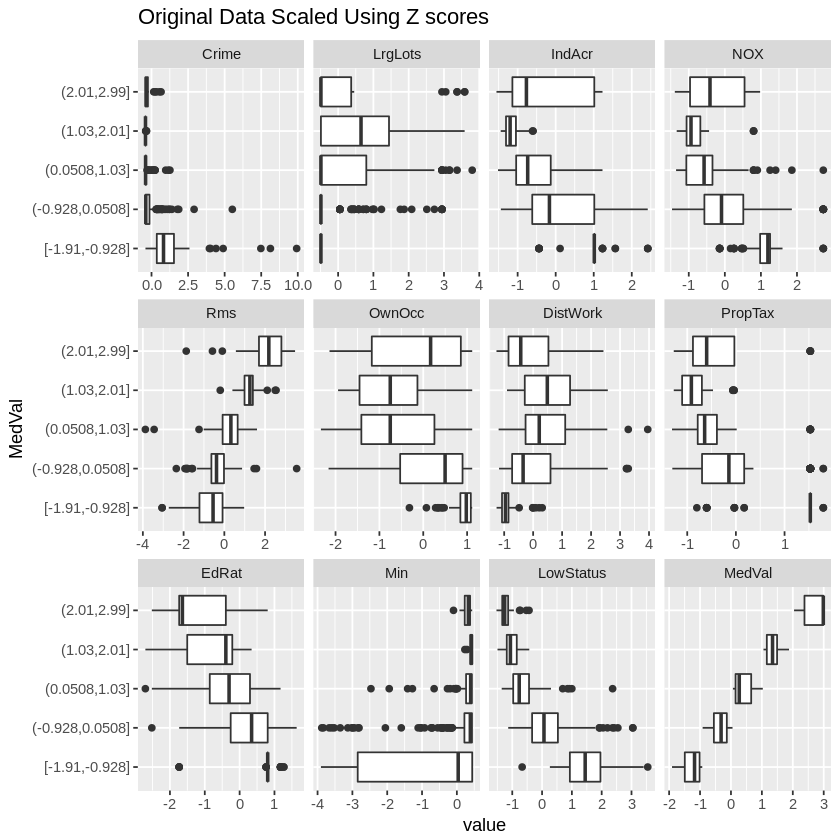

In [25]:
plot_boxplot(z, by = 'MedVal', title = 'Original Data Scaled Using Z scores')

#### It may seem redundant to look at the same data using different tools, but it really is a good data analytics practice.  We are at the early stages of the analysis of this data and we are trying to become familiar with it.  Looking at the same data from various perspectives is valuable at this stage for two reasons.  First, if the different visualization re-tell the same story, that is a good indicator that the story has value.  Second, if we notice something different in one perspective that we didn't see from the others, then we have a deeper understanding of the information that we would have had we stuck with a single-dimensional view.

#### Either way, the insights we gain into the data are valuable.  We can use the information for the next stage of the analysis, where we begin to model the data for predictive purposes.